# CodeAlpha Internship – Task 2: Exploratory Data Analysis (EDA)

**Dataset:** Superstore Sales Data  
**Intern:** Yash Mishra

---

## 📌 Objective
The goal of this task is to perform **Exploratory Data Analysis (EDA)** on the Superstore dataset to uncover insights into sales, profit, discounts, and customer behavior.  
Through data cleaning, descriptive statistics, and visualization, we aim to identify key business patterns and trends.  

---

# Importing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (10)\Sample - Superstore.csv", encoding="latin1")  # adjust encoding if needed
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# checking Null,Duplicates,Fixing DataTypes

In [15]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
# Convert Order Date & Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [23]:
# Convert categorical columns
categorical_cols = ['Category', 'Sub-Category', 'Region', 'Segment']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Descriptive Statistics

In [31]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [33]:
df.describe(include=['category'])

,Segment,Region,Category,Sub-Category
count,9994,9994,9994,9994
unique,3,4,3,17
top,Consumer,West,Office Supplies,Binders
freq,5191,3203,6026,1523


In [51]:
df.drop(columns=['Row ID', 'Postal Code'],inplace = True)

#  Univariate Analysis

In [53]:
num_f = df.select_dtypes(['float','int']).columns.tolist()
num_f

['Sales', 'Quantity', 'Discount', 'Profit']

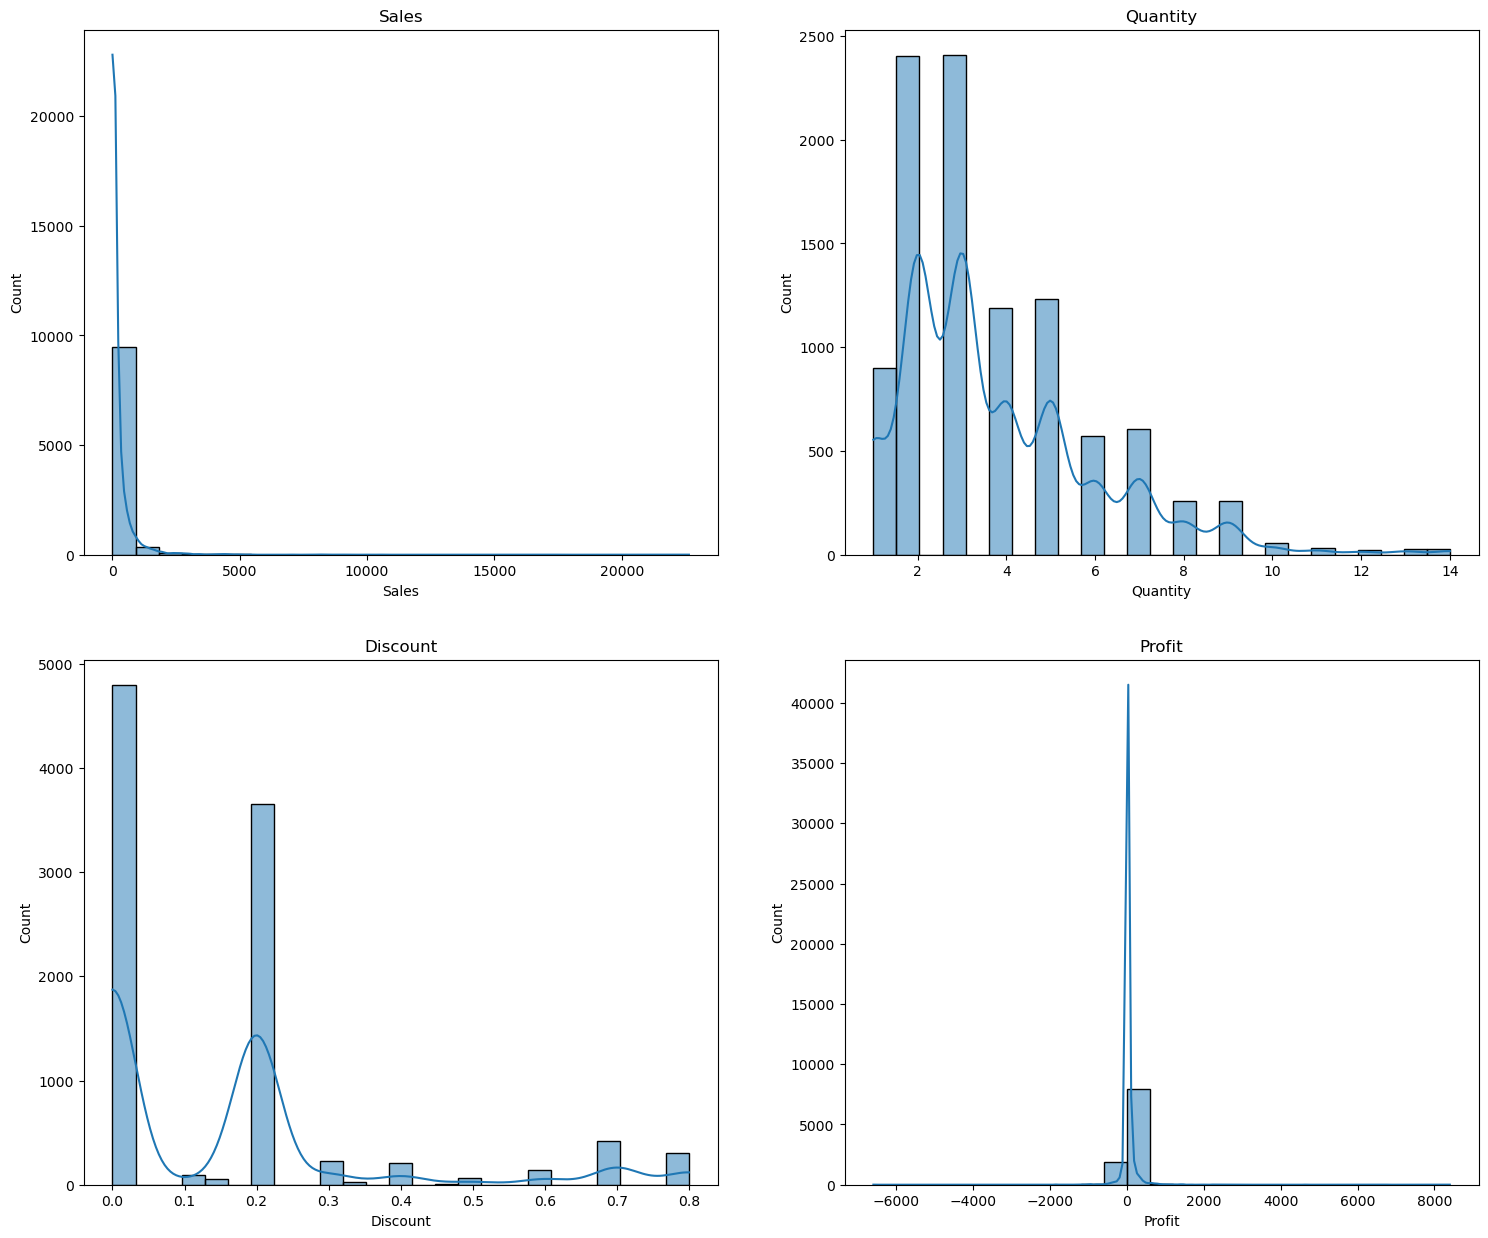

In [59]:
plt.figure(figsize=(18,15))
for i,col in enumerate(df[num_f],1):
    plt.subplot(2,2,i)
    sns.histplot(df[col],bins=25,kde=True)
    plt.title(col)

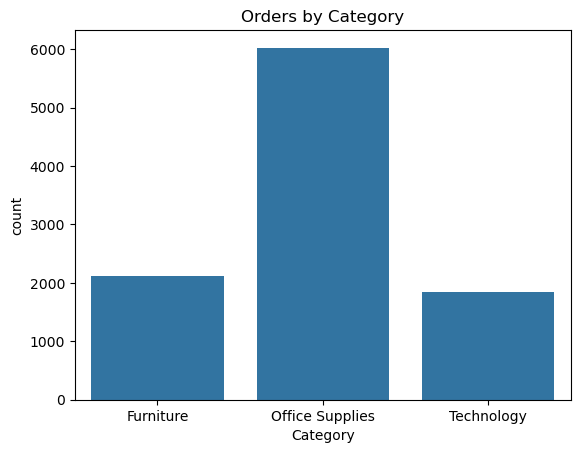

In [61]:
sns.countplot(data=df, x="Category")
plt.title("Orders by Category")
plt.show()

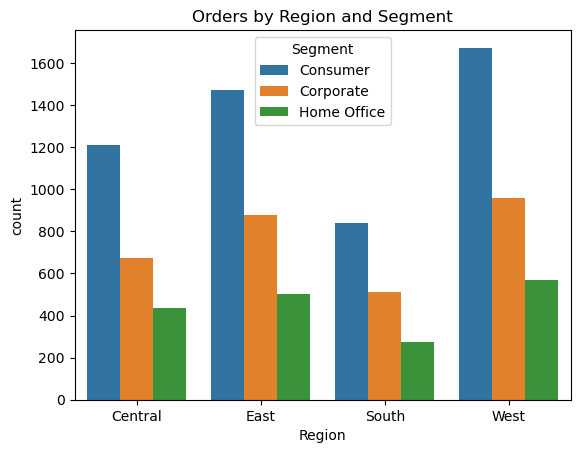

In [65]:
sns.countplot(data=df, x="Region",hue="Segment")
plt.title("Orders by Region and Segment")
plt.show()

# Bivariate Analysis

Text(0.5, 1.0, 'Profit vs Sales by Category')

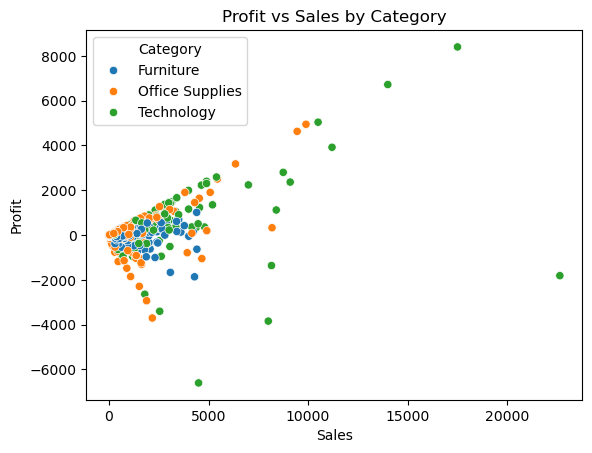

In [68]:
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Category')
plt.title("Profit vs Sales by Category")

Text(0.5, 1.0, 'Discount by Category')

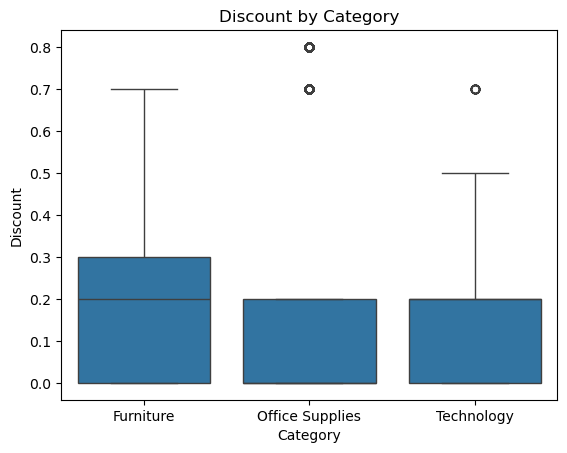

In [72]:
sns.boxplot(data=df,x='Category',y='Discount')
plt.title("Discount by Category")

Text(0.5, 1.0, 'Correlation Heatmap')

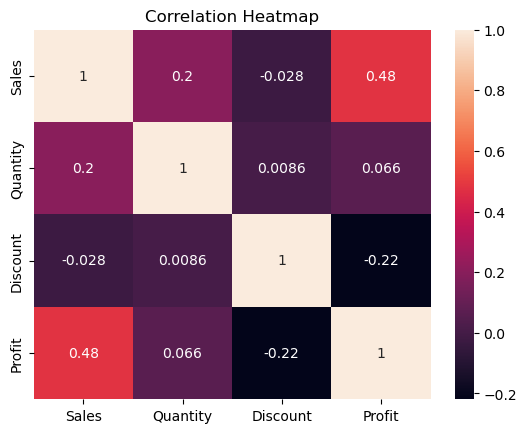

In [84]:
sns.heatmap(df[num_f].corr(),annot=True)
plt.title("Correlation Heatmap")

# Time Series Analysis

Text(0, 0.5, 'Sales')

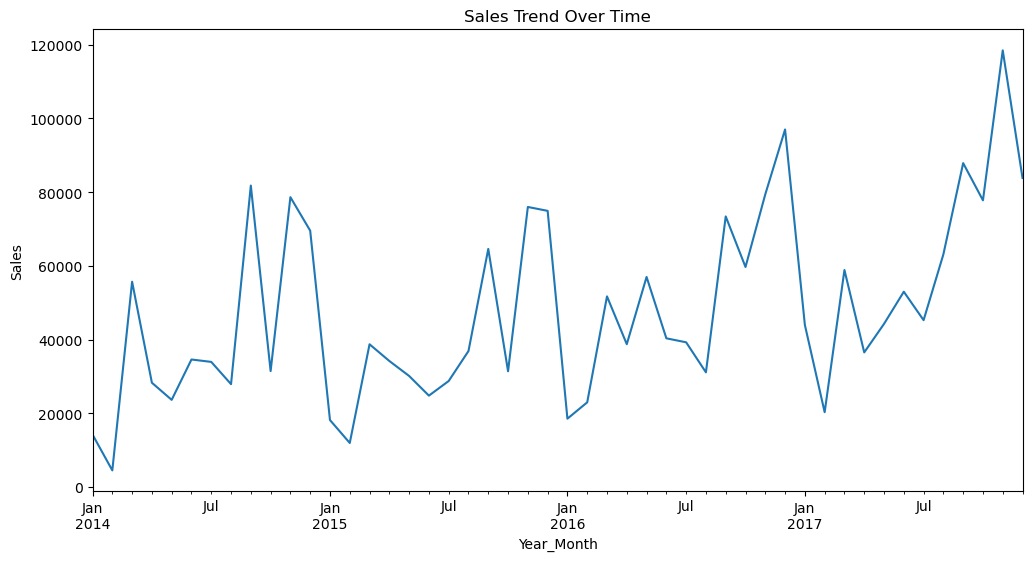

In [93]:
df['Year_Month'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Year_Month')['Sales'].sum()
sales_trend.plot(kind='line',figsize=(12,6))
plt.title('Sales Trend Over Time')
plt.ylabel('Sales')

# Time Series Analysis

In [103]:
df.groupby('Segment')[['Profit']].sum().sort_values(by='Profit',ascending=True).head(1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_976\4217548098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Segment')[['Profit']].sum().sort_values(by='Profit',ascending=True).head(1)


,Profit
Segment,
Home Office,60298.6785


In [105]:
df.groupby('Category')[['Profit']].sum().sort_values(by='Profit',ascending=True).head(1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_976\2282727692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')[['Profit']].sum().sort_values(by='Profit',ascending=True).head(1)


,Profit
Category,
Furniture,18451.2728


<Axes: xlabel='Discount', ylabel='Profit'>

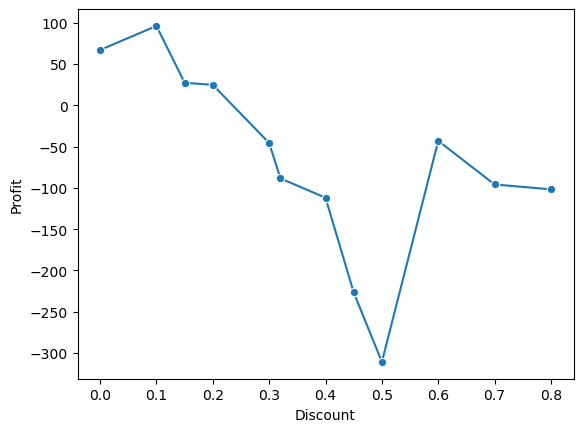

In [113]:
disc_prof = df.groupby('Discount')['Profit'].mean().reset_index()
sns.lineplot(data=disc_prof,x='Discount',y='Profit',marker='o')

##  Key Steps

1. **Data Cleaning** – Handle missing values, duplicates, and correct data types.  
2. **Descriptive Statistics** – Summarize numerical and categorical features.  
3. **Univariate Analysis** – Explore distributions of Sales, Profit, and Discounts.  
4. **Bivariate Analysis** – Study relationships such as Profit vs Sales, Discount impact.  
5. **Time Series Analysis** – Examine monthly and yearly sales trends.  
6. **Insights & Reporting** – Translate findings into actionable business insights.  

##  Expected Outcomes
- Identify **profitable and unprofitable categories/regions**.  
- Analyze whether **discounts help or hurt profits**.  
- Understand **seasonal sales trends**.  
- Build a strong **EDA portfolio project** showcasing real-world business insights.  

---

** GitHub Repository: `CodeAlpha_EDA_Superstore`